## Actividad 3_12
<div style="border-style:groove;border-width:thin;padding:10px">
Debes usar Random Forests para solucionar el ejercicio de MNIST. Recuerda que con Decision Tree llegamos al 87% de accuracy y con SVC llegamos al 98%. 
    </div>

<div style="border-style:groove;border-width:thin;padding:10px">
A continuación vamos a importar el dataset y a generar los conjuntos X e y.
    </div>

In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

<div style="border-style:groove;border-width:thin;padding:10px">
1. Divide el dataset en el conjunto de entrenamiento y de test.
    </div>

In [2]:
X, y = mnist["data"], mnist["target"]

from sklearn.model_selection import train_test_split

# Divide el conjunto de datos en un conjunto de entrenamiento y un conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<div style="border-style:groove;border-width:thin;padding:10px">
2. Crea un Random Forest con los parámetros que consideres oportuno para solucionar el problema.
    </div>

In [8]:
# Crea un RandomForestClassifier y ajústalo a los datos de entrenamiento
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(n_estimators=1000, random_state=42, n_jobs=-1, bootstrap=False) 
forest_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, n_estimators=1000, n_jobs=-1,
                       random_state=42)

<div style="border-style:groove;border-width:thin;padding:10px">
3. Genera la predicción (y_pred) con el árbol entrenado y mira la precisión que has conseguido. Módifica los parámetros del árbol en el código del punto 2 para mejorar los resultados.
    </div>

In [9]:
y_pred = forest_clf.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9722142857142857

<div style="border-style:groove;border-width:thin;padding:10px">
4. Recorre la muestra de test viendo los datos que son erróneos y muestra la imagen. Evalúa si el resultado es suficientemente bueno.
</div>

#### Hay dos formas de hacerlo:

In [10]:
import numpy as np

# Obtenemos los índices donde las etiquetas reales y predicciones no coinciden
indices_errores = np.where(y_test != y_pred)[0]

print(f"Total errores: {len(indices_errores)} de {len(y_test)}")

Total errores: 389 de 14000


In [11]:
# Recorre test y muestra solo las muestras mal clasificadas
import matplotlib.pyplot as plt

errores = 0

for real, pred in zip(y_test, y_pred):
    if real != pred:
        errores += 1

print(f"Total errores: {errores} de {len(y_test)}")

Total errores: 389 de 14000


Errores: 389 de 14000


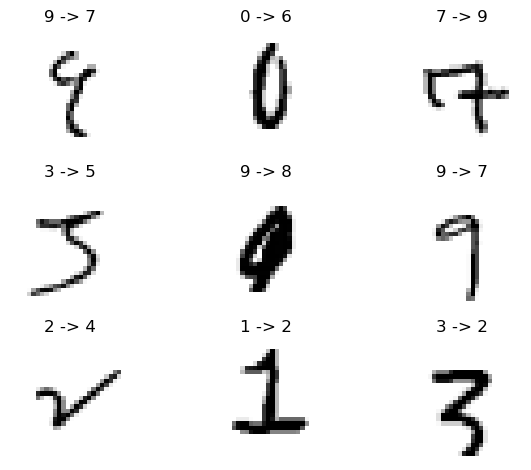

In [12]:
import numpy as np
import matplotlib.pyplot as plt

y_pred = forest_clf.predict(X_test)
errores = np.flatnonzero(y_pred != y_test)

print(f"Errores: {len(errores)} de {len(y_test)}")

n = min(9, len(errores))
for i in range(n):
    idx = errores[i]
    plt.subplot(3, 3, i + 1)
    plt.imshow(X_test.iloc[idx].values.reshape(28, 28), cmap="binary")
    plt.title(f"{y_test.iloc[idx]} -> {y_pred[idx]}")
    plt.axis("off")

plt.tight_layout()
plt.show()
